In [1]:
import numpy as np 

import tensorflow as tf
import tensorflow_probability as tfp
# -- plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [44]:
Mhalo = tf.convert_to_tensor(np.random.uniform(10., 15., 1000), dtype=tf.float32)
siglogm = tf.convert_to_tensor(0.2, dtype=tf.float32)
temperature = 0.2

def Ncen(Mmin): 
    # mean occupation of centrals
    return tf.clip_by_value(0.5 * (1+tf.math.erf((Mhalo - Mmin)/siglogm)), 1.e-4, 1 -1e-4)

def hod(Mmin): 
    bern = tfp.distributions.RelaxedBernoulli(temperature, probs=Ncen(Mmin))
    return bern.sample()

def numden(Mmin): 
    return tf.reduce_sum(hod(Mmin))

(10.0, 15.0)

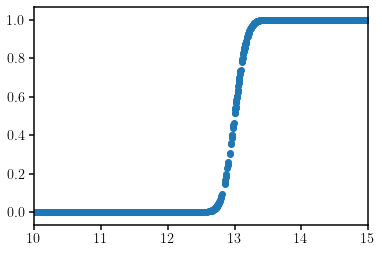

In [45]:
ncen = Ncen(13.0)
plt.scatter(Mhalo, ncen)
plt.xlim(10., 15.)

(10.0, 15.0)

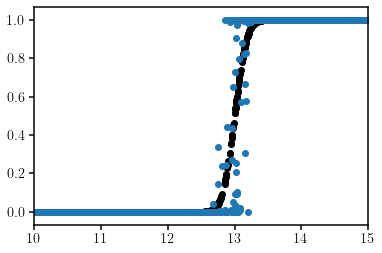

In [46]:
plt.scatter(Mhalo, ncen, c='k')
plt.scatter(Mhalo, hod(13.))
plt.xlim(10., 15.)

In [59]:
Mmin_true = 13.
numden_true = numden(Mmin_true).numpy()
print(numden_true)

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

_Mmin = tf.Variable(13.2, trainable=True, dtype=tf.float32)
trainable_variables = [_Mmin]

400.8346


In [60]:
mass_hist = []
for i in range(100):
    with tf.GradientTape() as tape:
        loss = (numden_true - numden(_Mmin))**2
    gradients = tape.gradient(loss, [_Mmin])
    opt.apply_gradients(zip(gradients, [_Mmin]))
    mass_hist.append(_Mmin.numpy())

(0, 100)

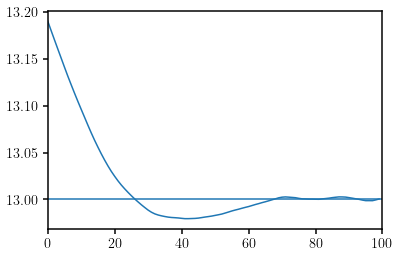

In [62]:
plot(mass_hist)
axhline(Mmin_true)
xlim(0,100)